# Project 2

# Title: TMDB Movie Data Analysis



## Table Of Contents:
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#ask">Questions About Dataset</a></li>
    <li><a href="#data">Wrangle Data</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions Of The Analysis</a></li>
    <li><a href="#result">Communicate The Result</a></li>
    <li><a href="#ref">Reference</a></li>
</ul>

<div id="intro"></div>

## Introduction:

<br></br>
> <p style="font-size:16px;">A commercially successful movie not only entertains audience, but also brings tremendous profit to movie production companies. In this project, we are going to explore 'TMDB movie dataset' from Kaggle which contains about 10000 movies, spanning across 56 years with 21 variables such as popularity, ratings, budget, revenue etc.</p>




<div id="ask"></div>

## Questions About Dataset:

<br></br>
<div style="font-size:16px">
    
> 1. What are the numbers of movies released every year? Which year has highest number of movies released?
2. Which movies are with higher budgets?
3. Which movies are with higher revenues?
4. Which movies are with higher profits? Which movies with highest and lowest profits?
5. What are the top longer movies? What is the longest movies?
6. Which are the higher rated movies?
7. What is the trend of profit rate over year to year?
8. What is the trend of average runtime over year to year? Does runtime affect the rating of movie?
9. In which year more popular movies released?
10. How popularity of a movie is releated to budget and rating?
11. How revenue is releated to budget, rating and popularity?
12. How profit of a movie is releated to budget and popularity of that movie?
13. With which genre maximum number of movies released? What are the number of movies released with all other genres?
14. Which are the more popular genres over the last three years? What are trends of the genres from year to year?
15. Which actor did maximum number of movies? Who are the top actors according to the number of movies he(she) did? Who are the top profitable actors?
16. Which production company releassed maximum number of movies? Which are the top production companies in movie making?
17. How much profits top production companies earned for the life time?
18. Which director directed maximum number of movies? Who are the top directors?
19. Which are the most popular keywords?
20. What are the correlations between budget, revenue, profit, vote_average and popularity?
    
</div>

In [1]:
# To investigate the movie dataset we have to import necessary python packages for data analysis. Here to mentaion that we have 
# to install packages besides importing for getting no error.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, plot, iplot
#import plotly.graph_objs as go
#import chart_studio.plotly as py
from wordcloud import WordCloud, STOPWORDS

<div id="data"></div>

## Wrangle Data:

<br></br>

<div style="font-size:16px">
    
>In this process of data analysis we do the following operations -
    
><ul>
    <li><a href="#gather">Gather Data</a></li>
    <li><a href="#access">Access Data</a></li>
    <li><a href="#clean">Clean Data (if necessary)</a></li>
</ul>

>For getting good quality and well structured data.

</div>

<div id="gather"></div>

### Gather Data:

In [2]:
# Here we read the csv file and load that data into Pandas DataFrame for the shake of analysis
# Here we store the data in movies_df DataFrame

movies_df = pd.read_csv('tmdb-movies.csv')

<div id="access"></div>

### Access Data:

<div style="font-size:16px">

> We have to access data to get an overall idea about the DatFrame in which we stored the necessary values. An overall idea 
helps us to clean the data according to the necessity and start our analysis.

</div>

In [3]:
# General Informations about the movies_df

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# print the first five rows of the dataframe

movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# print the last five rows of the dataframe

movies_df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
# print concise summery of the numeric columns

movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# Print the numbers of duplicated rows available in the dataframe

movies_df.duplicated().sum()

1

In [8]:
# Check number of null values each column has. Its a necessary steps for analysis for not getting error full results.
# We have to modify the null values according to our data analysis requirements.

movies_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# Check the number of unique values each column has

movies_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

<div id="clean"></div>

### Clean Data:

<div style="font-size:16px">
    
> After a sneak peak of the dataframe, I summerised the necessary steps for data cleaning as follows -
><ul>
    <li><a href="#unused">Drop uncessary columns</a></li>
    <li><a href="#duplicate">Drop duplicate row</a></li>
    <li><a href="#format">Format release date</a></li>
    <li><a href="#modify">Modify inappropriate values</a></li>
    
</ul>
</div>

<div id="unused", style="font-size:16px">

<p style="font-weight:bold">Remove columns those are not usefull:</p>
    
> We can see that there are 21 columns in the dataframe but there are few columns those are not required in the data analysis 
process like: imdb_id, homepage, tagline, overview etc. so we can remove those columns from the dataframe.

</div>

In [10]:
# Remove the columns like 'imdb_id', 'overview', 'tagline', 'homepage'.
# Print the size of the dataframe after removing the columns

movies_df.drop(['overview','imdb_id','homepage','tagline'], axis=1, inplace=True)
print('After removing unsed columns (Rows, Columns):', movies_df.shape)

After removing unsed columns (Rows, Columns): (10866, 17)


<div id="duplicate", style="font-size:16px">
    
<p style="font-weight:bold">Remove duplicate row:</p>
    
> There is one duplicate row that is not required for the analysis, so its safe to remove that from the dataframe.

</div>


In [11]:
# Here we remove the duplicate row that we find eariler.
# Print the shape of the dataframe after deleting the duplicate row

movies_df.drop_duplicates(inplace=True)
print('After removing duplicate row (Rows, Columns):', movies_df.shape)

After removing duplicate row (Rows, Columns): (10865, 17)


<div id="format", style="font-size:16px">

<p style="font-weight:bold">Chage datatype of Release Date</p>

> In the daframe the release_date is a string object but we need to convert it to datetime object.
</div>

In [12]:
# Here we change release_data from stirng to datetime object

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<div id="modify", style="font-size:16px">

<p style="font-weight:bold">Modify inappropriate values</p>

> We can see above that in the dataframe there are lots of movies where budget and revenue have a value of '0', but the fact is 
budget of a movie that was made cant be '0', it may be relevant information was not stored peoperly. On the otherside a released movie cant has '0' revenue, it may either movie is not released or correct information was not stored. So we modify 
the values later on according to the necessity during analysis.

</div>

In [13]:
# print the numver of zero values in budget and revenue columns

print('Number of zero values in budget: ', movies_df.query('budget==0').shape[0])
print('Number of zero values in revenue: ', movies_df.query('revenue==0').shape[0])

Number of zero values in budget:  5696
Number of zero values in revenue:  6016


<div id="eda"></div>

## Exploratory Data Analysis(EDA):

<div style="font-size:16px">

> We trimmed and cleaned our data and ready to move further. Here in this process of data analysis we compute statistics and 
create visualization about relationships between various factors with the goal of addressing the research questions that I 
posted in questions section.

</div>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A11EDB5A90>,
      dtype=object)

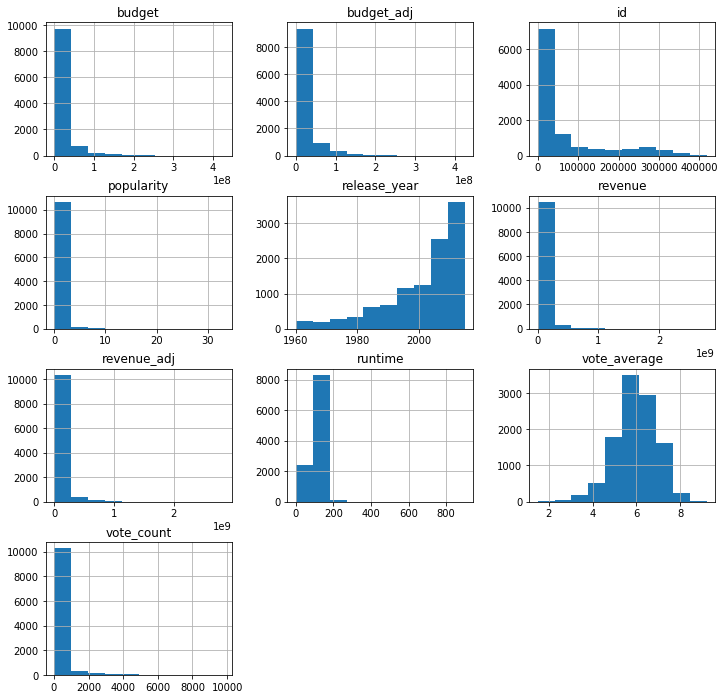

In [14]:
# Here we first explore the quantitative features of movies.
# Here we draw the histograms of those features.

movies_df.hist(figsize=(12,12))

### Q1: What are the numbers of movies released every year? Which year has highest number of movies released?

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


Text(0, 0.5, 'Number Of Movies Released')

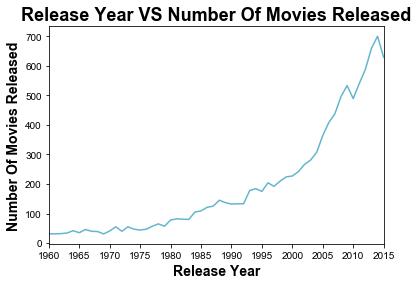

In [15]:
# Make groups in data by 'release_year' and count number of movies released in a particular year and store that in Seris

movie_count = movies_df.groupby('release_year').count()['id']
print(movie_count.tail())

# Make a plot of the data stored in movie_count seris to create a visualization

movie_count.plot(color='c', xticks = np.arange(1960, 2016, 5))

# Set the figure size and label the axes

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
plt.title('Release Year VS Number Of Movies Released', fontsize=18, fontweight='bold')
plt.xlabel('Release Year', fontsize=14, fontweight='bold')
plt.ylabel('Number Of Movies Released', fontsize=14, fontweight='bold')

> **From the above plot we can see that by the year more movies released. And in 2014 maximum number of movies released (700)
followed by 2013 (659) and 2015 (629)**

> **min_max() This created function will be used to find minimum and maximum of each numeric column in DataFrame**

In [16]:
def min_max(a):
    # Get the indices of max and min values of the column
    
    high_ind = movies_df[a].idxmax()
    low_ind = movies_df[a].idxmin()
    
    # Get the details of the max and min values from the dataframe
    
    high = pd.DataFrame(movies_df.loc[high_ind])
    low = pd.DataFrame(movies_df.loc[low_ind])
    
    return pd.concat([high,low], axis=1)

### Q2: Which movies are with higher budgets?

In [17]:
# To find the minimum budget movie we have to replace '0' values by NaN, otherwise a movie with '0' budget will be the minimum
# budget movie. Here we find max and min of budget using min_max().

movies_df['budget'] = movies_df['budget'].replace(0,np.NAN)
min_max('budget')

,2244,1151
id,46528,287524
popularity,0.25054,0.177102
budget,4.25e+08,1
revenue,11087569,0
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror


> **We can see that 'The Warrior\'s Way' is the highest budget movie with 425 M(doller) and 'Fear Clinic' is the lowest budget movie with $1**

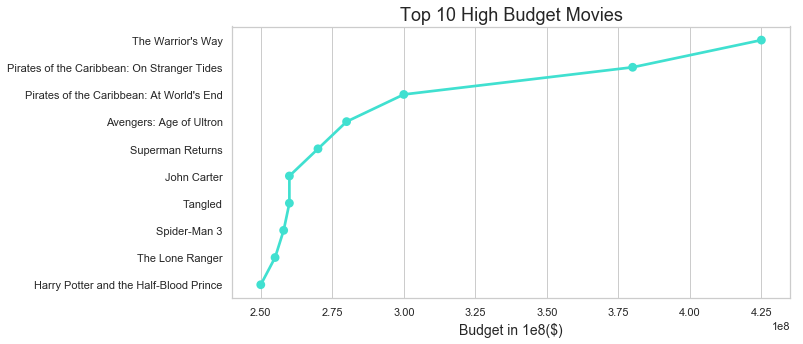

In [18]:
# Here we plot a pointplot to show top 10 movies with high budget

info_budget = pd.DataFrame(movies_df.sort_values(by='budget', ascending=False))
x = list(info_budget['budget'])[:10]
y = list(info_budget['original_title'])[:10]

# Make pointplot and label the axes. Style the plot.

budget_ax = sns.pointplot(x=x, y=y, color='Turquoise')
budget_ax.set_title('Top 10 High Budget Movies', fontsize=18)
budget_ax.set_xlabel('Budget in 1e8($)', fontsize =14)
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')

### Q3: Which movies are with higher revenues?

> **In the dataset there are many movies with '0' revenue, it may happens when movie is not released. But without so much 
clarification about that we cant change values to NaN. So in this case we keep those values unchanged and make analysis.**



In [19]:
# Here we find the movies with min and max revenue using min_max().

min_max('revenue')

,1386,48
id,19995,265208
popularity,9.43277,2.93234
budget,2.37e+08,3e+07
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
keywords,culture clash|future|space war|space colony|so...,gambling|bodyguard|remake
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama


> **We can see that 'Avatar' is the highest revenue movie with 2.78 B and 'Wild Card' is the lowest revenue movie with 0 revenue**

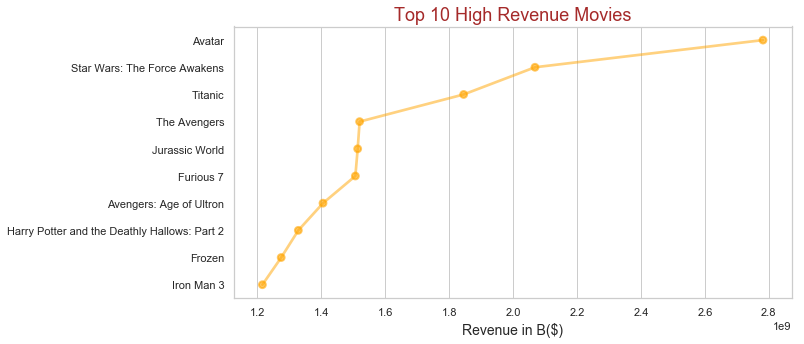

In [20]:
# Here we plot a pointplot to see the top 10 movies with high revenue

info_reve = pd.DataFrame(movies_df.sort_values(by='revenue', ascending=False))
x = list(info_reve['revenue'])[:10]
y = list(info_reve['original_title'])[:10]

# Plot the pointplot and label the axes and style the figure.

reve_ax = sns.pointplot(x=x, y=y, color='orange')

reve_ax.set_title('Top 10 High Revenue Movies', fontsize = 18, color='brown')
reve_ax.set_xlabel('Revenue in B($)', fontsize=14)

plt.setp(reve_ax.collections, alpha=.6)
plt.setp(reve_ax.lines, alpha=.5)
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')

### Q4: Which movies are with higher profits? Which movies with highest and lowest profits?

In [21]:
# To see the profit of each movie we have to create a new columnusing min_max().

movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Now find the movies with max and min profit

min_max('profit')

,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


> **We can see 'Avatar' is the most profitable movie with 2.54 B and 'The Warrior\'s Way' is the least profitable movie with
loss of 413 M**

[None, None, None, None, None, None, None, None, None, None, None]

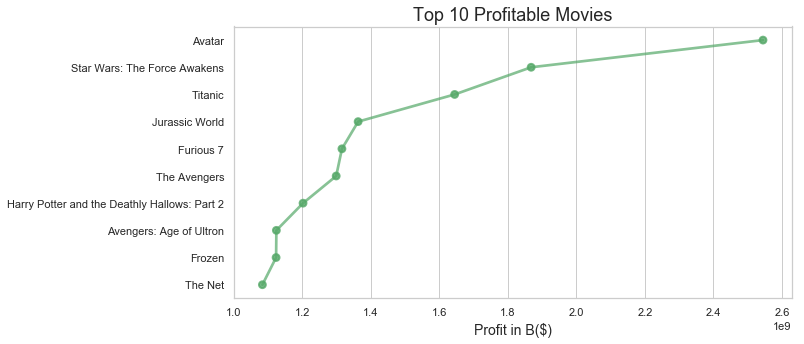

In [22]:
# Here we plot a pointplot to see top 10 profitable movies

info_profit = pd.DataFrame(movies_df.sort_values(by='profit',ascending=False))
x = list(info_profit['profit'])[:10]
y = list(map(str,info_profit['original_title']))[:10]

profit_ax = sns.pointplot(x=x, y=y, color='g')
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
profit_ax.set_title('Top 10 Profitable Movies', fontsize = 18)
profit_ax.set_xlabel('Profit in B($)', fontsize=14)
plt.setp(profit_ax.collections, alpha=.8)
plt.setp(profit_ax.lines, alpha=.7)

### Q5: What are the top longer movies? What is the longest movies?

> **There are few movies which have '0' runtime that is not possible for a movie. So for the shake of analysis we replace '0'
by NaN.**

In [23]:
# Replace the '0' values by NaN and find max and min runtime of movies using min_max().

movies_df['runtime'] = movies_df['runtime'].replace(0, np.NAN)
min_max('runtime')

,3894,4883
id,125336,142563
popularity,0.006925,0.078472
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
director,Mark Cousins,PES
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,NaN
runtime,900,2
genres,Documentary,Animation


> **We can see 'The Story of Film: An Odyssey' is the longest movie with runtime of 900 minutes and 'Fresh Guacamole' is the
shortest movie with 2 minute runtime.**

[None, None, None, None, None, None, None, None, None, None, None]

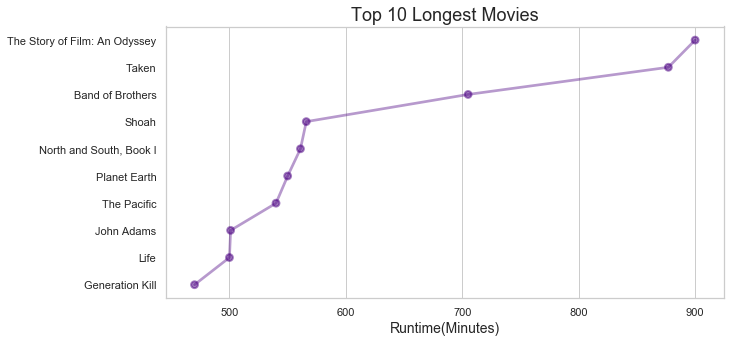

In [24]:
# Here we plot a pointplot to see top 10 longest movies.

info_run = pd.DataFrame(movies_df.sort_values(by='runtime', ascending=False))
x = list(info_run['runtime'])[:10]
y = list(info_run['original_title'])[:10]

run_ax = sns.pointplot(x=x, y=y, color='indigo')
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('darkgrid')
run_ax.set_title('Top 10 Longest Movies', fontsize=18)
run_ax.set_xlabel('Runtime(Minutes)', fontsize=14)
plt.setp(run_ax.collections, alpha=0.5)
plt.setp(run_ax.lines, alpha=0.4)

### Q6: Which are the higher rated movies?

In [25]:
# Here we find which movie has highest rating and which movie has lowest rating as well using min_max().

min_max('vote_average')

,3894,7772
id,125336,25055
popularity,0.006925,0.12112
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Transmorphers
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director,Mark Cousins,Leigh Scott
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,futuristic
runtime,900,86
genres,Documentary,Action|Adventure|Science Fiction


> **We can see 'The Story of Film: An Odyssey' has highest rating of 9.2 and 'Transmorphers' is the lowest rating movie with
1.5 rating.**

[None, None, None, None, None, None, None, None, None, None, None]

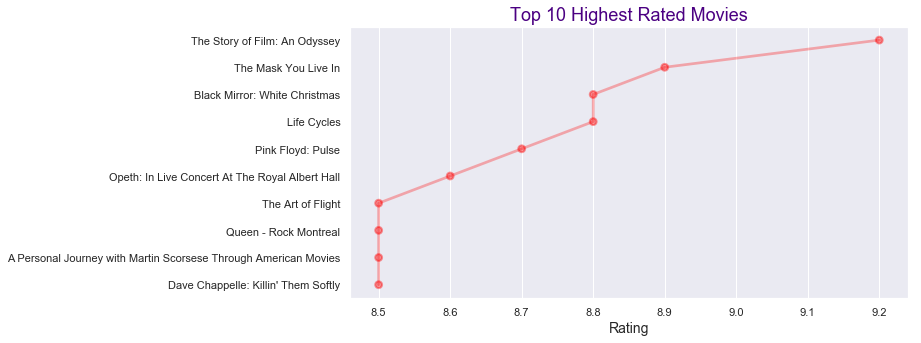

In [26]:
# Here we plot a pointplot to see top 10 highest rated movies

info_rating = pd.DataFrame(movies_df.sort_values(by='vote_average', ascending=False))
x = list(info_rating['vote_average'])[:10]
y = list(info_rating['original_title'])[:10]

rating_ax = sns.pointplot(x=x, y=y, color='red')
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
rating_ax.set_title('Top 10 Highest Rated Movies', fontsize=18, color='indigo')
rating_ax.set_xlabel('Rating', fontsize=14)
plt.setp(rating_ax.collections, alpha=.4)
plt.setp(rating_ax.lines, alpha=.3)

### Q7: What is the trend of profit rate over year to year?

Text(0, 0.5, 'Average Profit in 1e8($)')

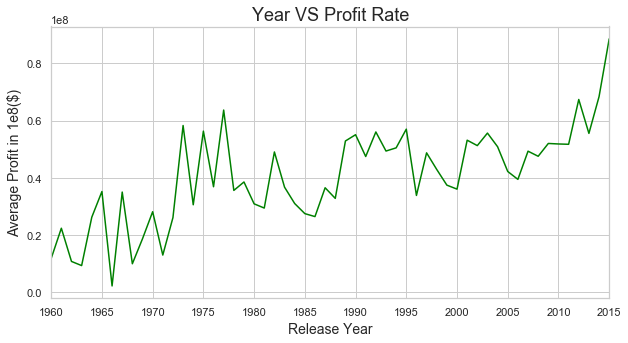

In [27]:
# Here we do year wise analysis of profits based on the profits earned by the movies in each year.
# Here we take the averages profits of each year for making the plot.
# Make group of data by release_year and find the mean of the profits and then plot.

movies_df.groupby('release_year')['profit'].mean().plot(color='green', xticks=np.arange(1960, 2016, 5))

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')

plt.title('Year VS Profit Rate', fontsize=18)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Profit in 1e8($)', fontsize=14)

> **From the above plot we can see that generally there ia an upeard trend of profit. And some years in between 1973 to 1977 there were more profits in movies. And in 2015 we have highest profit.**

### Q8: What is the trend of average runtime over year to year? Does runtime affect the rating of movie?

Text(0, 0.5, 'Average Runtime')

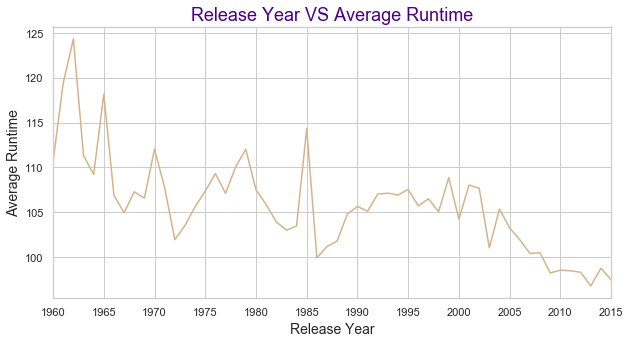

In [28]:
# Here we analysis the trend of average runtime of the movies in each year.
# We group data by release_year and take the averages of the runtime and then plot.

movies_df.groupby('release_year')['runtime'].mean().plot(color='Tan', xticks=np.arange(1960, 2016, 5))

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')

plt.title('Release Year VS Average Runtime', fontsize=18, color='indigo')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Runtime', fontsize=14)

> **From the above plot we can see that there is generally a downward trend of runtime of movies, means runtime of movies
released in recent years is shorter in time than the previously released movies. And in 1962 runtimes of the movies were higher.**

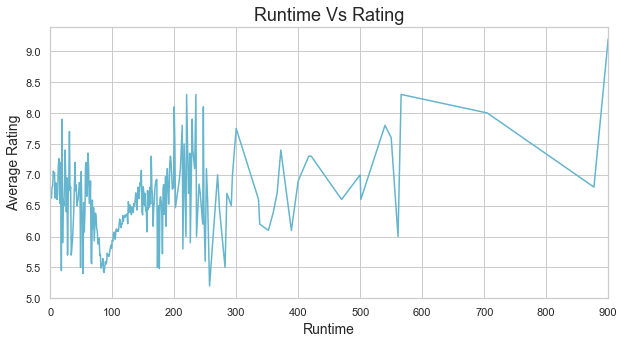

In [29]:
# Here we analyse the relationship between the runtime and rating of movie.

movies_df.groupby('runtime')['vote_average'].mean().plot(color='c', xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Rating",fontsize = 18)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 14)
plt.ylabel('Average Rating',fontsize = 14)

#setup the figure size.
sns.set(rc={'figure.figsize':(15,7)})
sns.set_style("whitegrid")

> **From the above plot we can see that rating is not much affected by the runtime.**

### Q9: In which year more popular movies released?

Text(0, 0.5, 'Average Populairty Of Movies In a Year')

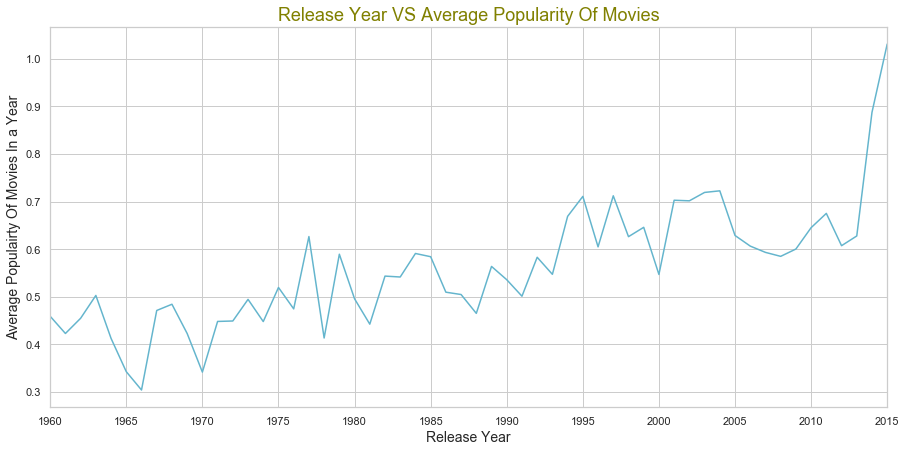

In [30]:
# Here we analysis in which year more number of popular movies released.
# We group the data by release_year and then take averages of the popularity of the movies in each year and then plot.

movies_df.groupby('release_year')['popularity'].mean().plot(color='c', xticks=np.arange(1960, 2016, 5))

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')

plt.title('Release Year VS Average Popularity Of Movies', fontsize=18, color='olive')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Populairty Of Movies In a Year', fontsize=14)

> **From the above plot we can see there is generally an upward trend of movie popularity. We can say that time by time movies are being more popular. And in 2015 more popular movies were released. As year by year movies popularity index is going up we can say that movies are being more popular among the audiences and audiences are more interested than long years back.**

### Q10: How popularity of a movie is releated to budget and rating?

Text(0, 0.5, 'Average Popularity')

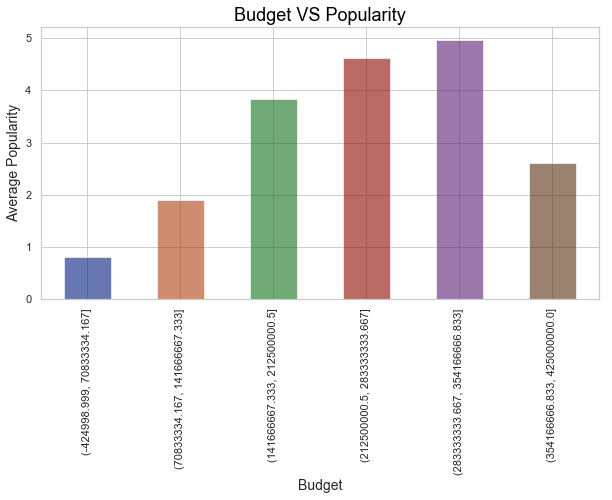

In [31]:
# Here we analyse the relationship between popularity and budget of movies. Is actually they are related if yes then how??
# Here we plot bar diagram to dividing budget range in some levels.
# We create a new column named 'budget_level' and the value will be that lavel in which that particular movie belonged to.

movies_df['budget_level'] = pd.cut(movies_df['budget'], 6)

movies_df.groupby('budget_level')['popularity'].mean().plot(kind='bar', color=sns.color_palette('dark'), alpha=.6)
plt.title('Budget VS Popularity', fontsize=18, color='black')
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)

Correlation Coefficient is:  0.4799612326


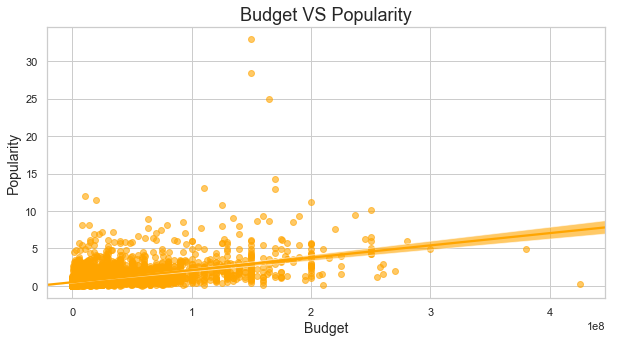

In [32]:
# Here we create a scatter plot to visualize the relationship between popularity and budget more better.
# Here we also get correlation coefficient.

pop_bud_ax = sns.regplot(x=movies_df['budget'], y=movies_df['popularity'], color='orange')

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')

plt.title('Budget VS Popularity', fontsize=18)
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.setp(pop_bud_ax.collections, alpha=.6)

print('Correlation Coefficient is: ', movies_df.corr().loc['budget', 'popularity'].round(10))

> **From the above two diagram we can conclude that if a movie is built with more budget that may be more popular. Correlation coefficient between popularity and budget is positive(.48) means with budget increase there is a chance of more popularity. Actually a movie with more budget is contentually rich that may be the reason of more popularity.**

Text(0, 0.5, 'Average Popularity')

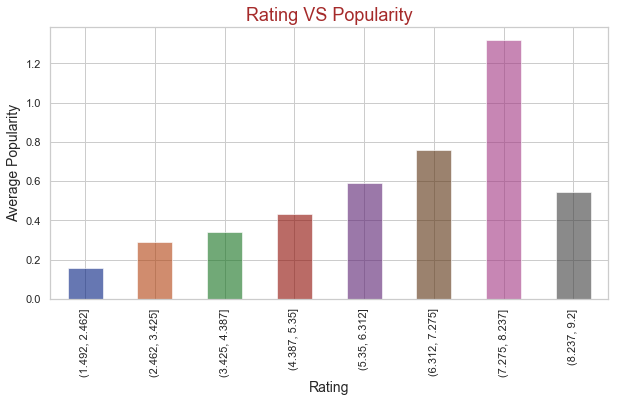

In [33]:
# Here we create a bar diagram to see the relationship between popularity and rating of movies.
# Here we divide the total rating range in some levels and draw the bar diagram.
# We create a new column called 'rating_level'

movies_df['rating_level'] = pd.cut(movies_df['vote_average'], 8)

movies_df.groupby('rating_level')['popularity'].mean().plot(kind='bar', color=sns.color_palette('dark'), alpha=.6)
plt.title('Rating VS Popularity', fontsize=18, color='brown')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)

Correlation Coefficient is:  0.2095170141


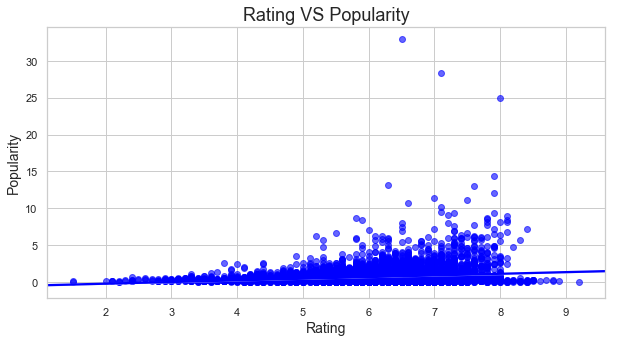

In [34]:
# Here we plot a scatter diagram to get more nice visualiztion about relation between popularity and rating of movies.
# We get the correlation coefficient.

pop_rati_ax = sns.regplot(x=movies_df['vote_average'], y=movies_df['popularity'], color='blue')
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
plt.title('Rating VS Popularity', fontsize=18)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.setp(pop_rati_ax.collections, alpha=.6)

print('Correlation Coefficient is: ', movies_df.corr().loc['vote_average', 'popularity'].round(10))

> **From the above two plots we can visualize the relation between popularity and rating of movies. Both shows geneally positive trend about the relationship, though the chances is small. We get correlation coefficient as positive(0.21), hence higher rated movie will be more popular generally.**

### Q11: How revenue is releated to budget, rating and popularity?

> **Here we find that is revenue is related to budget, rating and popularity and if yes then how they are related to? Our objective is to find the depending factors of revenue of movies.**

Correlation Coefficient is:  0.6885561525


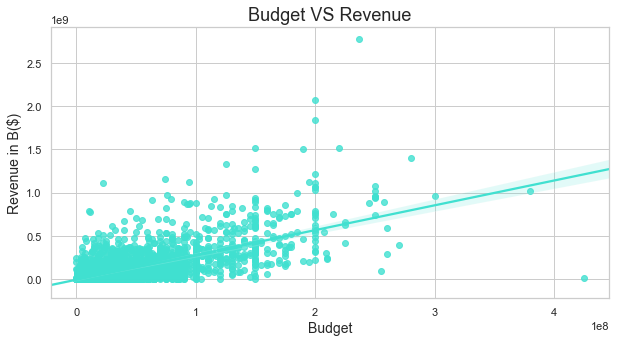

In [35]:
# Here we find relationship of budget and revenue through scatter plot
# find the correlation coefficient 

reve_ax = sns.regplot(x=movies_df['budget'], y=movies_df['revenue'], color='Turquoise')

sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('whitegrid')
plt.title('Budget VS Revenue', fontsize=18)
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Revenue in B($)', fontsize=14)

# To find the correlation coefficient we replace the '0' values in 'revenue' and 'profit' with NaN to get correct value of coefficient

movies_df['revenue'] = movies_df['revenue'].replace(0, np.NAN)
movies_df['profit'] = movies_df['profit'].replace(0, np.NAN)

print('Correlation Coefficient is: ', movies_df.corr().loc['budget', 'revenue'].round(10))

> **From the plot we can see that with budget increase its expected that revenue will be increased. The correlation coeeficient 
is positive with the value of 0.69 and from this we can conclude that higher budget movie will earn more revenue.**

Correlation Coefficient is:  0.6293048642


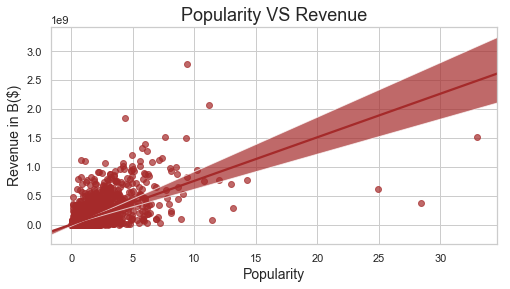

In [36]:
# Here we find relationship of popularity and revenue through scatter plot
# find the correlation coefficient 

rev_ax = sns.regplot(x=movies_df['popularity'], y=movies_df['revenue'], color='brown')

plt.setp(rev_ax.collections, alpha=.7)
plt.title('Popularity VS Revenue', fontsize=18)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Revenue in B($)', fontsize=14)
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('whitegrid')

print('Correlation Coefficient is: ', movies_df.corr().loc['popularity', 'revenue'].round(10))

> **From the above plot and the positive correlation coefficient it can be said that more popular movies will generate more
revenue.**

Correlation Coefficient is:  0.2068473921


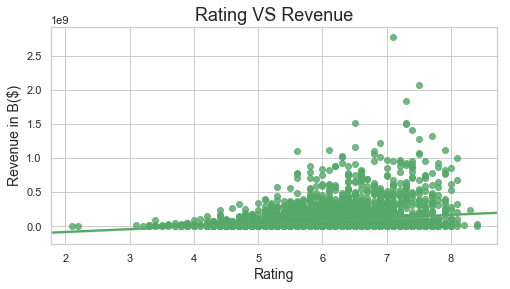

In [37]:
# Here we find relationship of vote_average and revenue through scatter plot
# find the correlation coefficient 

rat_ax = sns.regplot(x=movies_df['vote_average'], y=movies_df['revenue'], color='g')

plt.setp(rev_ax.collections, alpha=.7)
plt.title('Rating VS Revenue', fontsize=18)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Revenue in B($)', fontsize=14)
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('whitegrid')

print('Correlation Coefficient is: ', movies_df.corr().loc['vote_average', 'revenue'].round(10))

> **The above plot and correlation coefficient show that there is a tendency that high rated movie will generate more revenue.**

### Q12: How profit of a movie is releated to budget and popularity of that movie?

Correlation Coefficient is:  0.5383810819


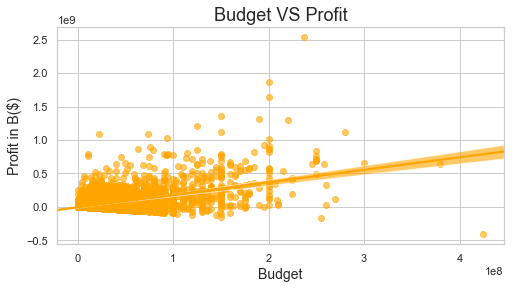

In [38]:
# Here we find how profit is related to budget?
# Also find the correlation coefficient.


pro_ax = sns.regplot(x=movies_df['budget'], y=movies_df['profit'], color='orange')

sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('whitegrid')
plt.title('Budget VS Profit', fontsize=18)
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Profit in B($)', fontsize=14)
plt.setp(pro_ax.collections, alpha=.6)

print('Correlation Coefficient is: ', movies_df.corr().loc['budget', 'profit'].round(10))

> **Above scatter plot and correlation coefficient suggest that a movie with more budget may earn more profit as that movie will be more rich in content.**

Correlation Coefficient is:  0.6161404949


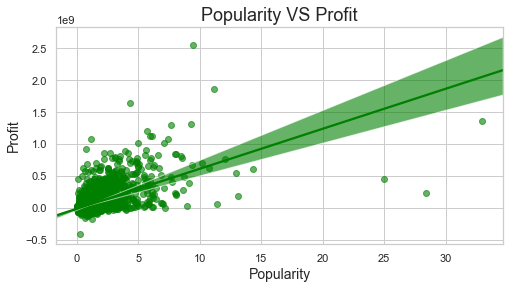

In [39]:
# Get visualiztion about the relationship between popularity and profit.
# Also get correlation coefficient.

pro_ax = sns.regplot(x=movies_df['popularity'], y=movies_df['profit'], color='green')

sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('whitegrid')
plt.title('Popularity VS Profit', fontsize=18)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.setp(pro_ax.collections, alpha=.6)

print('Correlation Coefficient is: ', movies_df.corr().loc['popularity', 'profit'].round(10))

> **Correlation coefficient is positive and with high value of 0.616 . From the above evidence its expected that more popular movie will earn more profit.**

> _We create a new function called count_category() to count indivisual value in a column where values are combined and seperated by '|' in the cells of the dataframe. This function will be used in later for analysis._

In [40]:
# This function take column_name as argument and return a pnadas Series

def count_category(a):
    total_cat = movies_df[a].str.cat(sep='|')
    cat_list = pd.Series(total_cat.split(sep='|'))
    return cat_list.value_counts(ascending=False)

### Q13: With which genre maximum number of movies released? What are the number of movies released with all other genres?

Text(0, 0.5, 'Number Of Movies')

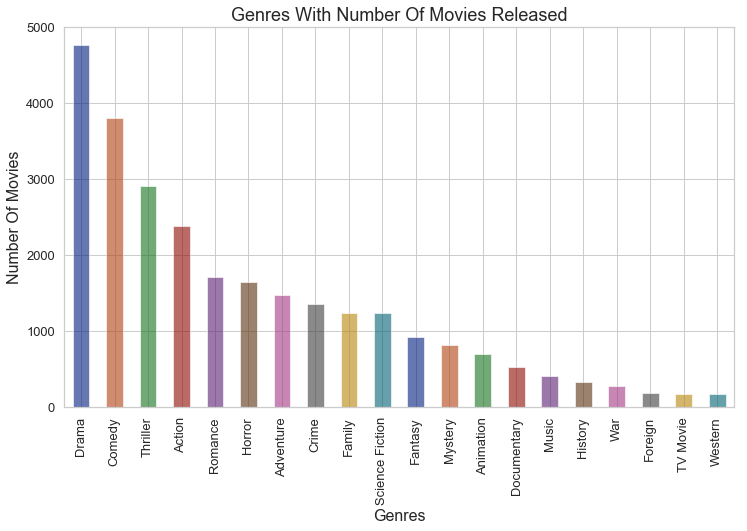

In [41]:
# Here we count the occurrence of genres and store them in a seris named total_genres and then create a bar diagram from that

total_genres = count_category('genres')
total_genres.plot(kind='bar', fontsize=13, figsize=(12,7), color=sns.color_palette('dark'), alpha=.6)
sns.set_style('whitegrid')

# Label the plot
plt.title('Genres With Number Of Movies Released', fontsize=18)
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Number Of Movies', fontsize=16)

> **From the above diagram we can see that 'Drama' genre has maximum number of movies released, followed by 'Comedy' and 'Thriller'.**

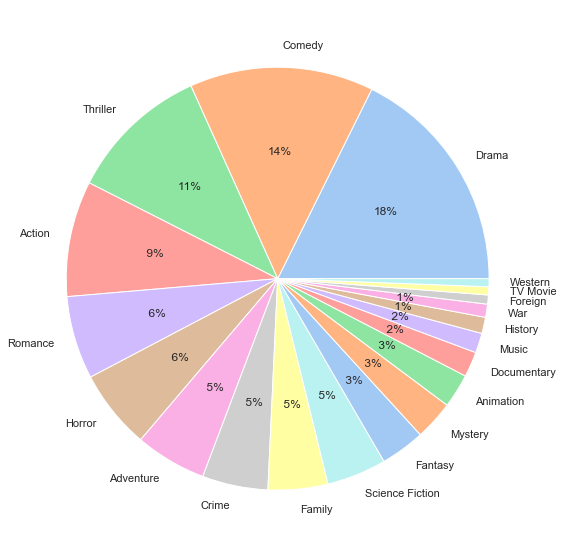

In [42]:
# Here a pie chart is created to get more nice visualization about the share of each genre in the released movies.

genres_cat = []
for genre in total_genres.index:
    genres_cat.append([genre, total_genres[genre]])
    
    
fig, ax = plt.subplots(figsize=(8,8))

# Sort the genres_cat list in descending order
genres_cat.sort(key= lambda x:x[1], reverse=True)

# Unzip the genres_cat list of lists
labels, sizes = zip(*genres_cat)

labels = list(labels)

# Create pie chart
ax.pie(sizes, labels=labels,
       autopct = lambda x:'{:2.0f}%'.format(x) if x>1 else '',
       shadow=False, startangle=0, colors=sns.color_palette('pastel'))

ax.axis('equal')
plt.tight_layout()
plt.rc('font', weight='bold')

> _From the above Pie chart we get an idea about the share of genres in the released movies._

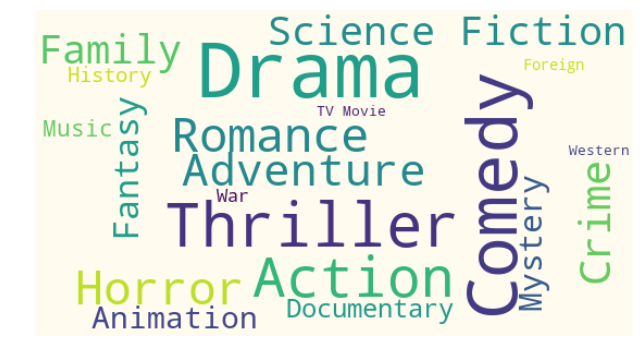

In [43]:
# Here wordcloud is created with the genres according to their share.

words = dict()
for g in genres_cat:
    words[g[0]] = g[1]
    
f, ax = plt.subplots(figsize=(14,6))
wordcloud = WordCloud(background_color='#FFFBEF', max_font_size=70, width=550, height=300)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

> _From this wordcloud also we get a visualiztion of the share of the genres in the released movies._

### Q14: Which are the more popular genres over the last three years? What are trends of the genres from year to year?

In [44]:
# Here we create visualiztion using average popularity.

#map all the rows of genres in a list.
genre_list = list(map(str,(movies_df['genres'])))

# This labels is used in pie chart and this list contains all the genres.
# 'nan' is added at the end of the list to eliminate error
labels.append('nan')

years = np.array(movies_df['release_year'])
popularity = np.array(movies_df['popularity'])

# Create two new dataframe popularity_df and count_genre_in_year and set the values of all cells to 0.0
popularity_df = pd.DataFrame(index = labels, columns = range(1960, 2016))
count_genre_in_year_df = pd.DataFrame(index = labels, columns = range(1960, 2016))
popularity_df = popularity_df.fillna(value = 0.0)
count_genre_in_year_df = count_genre_in_year_df.fillna(value = 0.0)

# Modify the values of the dataframe
y = 0
for genre in genre_list:
    split_genre = list(map(str,genre.split('|')))
    popularity_df.loc[split_genre, years[y]] = popularity_df.loc[split_genre, years[y]] + popularity[y]
    count_genre_in_year_df.loc[split_genre, years[y]] = count_genre_in_year_df.loc[split_genre, years[y]] + 1
    y+=1

popularity_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Drama,7.361967,6.915731,8.232008,4.191829,7.296370,6.105756,5.436264,8.183477,7.546450,6.368528,...,109.448943,109.945124,123.854529,126.897208,123.118794,128.088313,140.376994,166.999176,246.362717,243.848091
Comedy,3.168003,6.798382,1.365917,5.778254,7.859657,2.511049,5.178531,7.391972,2.965935,3.246052,...,97.197895,79.415945,86.858673,111.045444,99.039863,115.304366,104.231064,105.688203,160.332602,152.041317
Thriller,4.871460,0.000000,5.324075,7.199292,5.603219,3.773787,2.190952,3.509897,2.779596,2.613848,...,75.973838,92.120424,86.206629,102.665018,99.392674,116.041838,108.295298,128.550095,186.504459,239.720907
Action,4.725796,2.561389,5.671563,3.806916,4.065433,4.062358,3.686859,5.064989,2.193374,5.399760,...,60.259233,72.254120,88.585296,93.794086,100.116607,121.681073,111.986677,122.089178,216.979690,240.901421
Romance,3.247365,2.982255,1.828107,3.196581,1.994275,3.113899,2.111415,4.591895,1.562137,1.153067,...,42.824858,39.021882,54.586724,50.982405,53.865920,50.677041,51.936521,39.702135,52.850344,54.085299


Text(0, 0.5, 'Populairty Index')

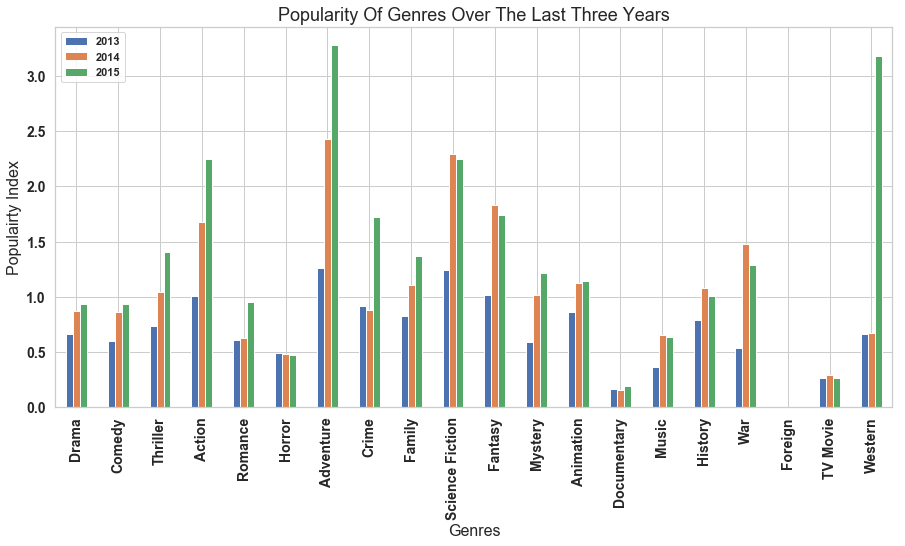

In [45]:
# Here we perform vector division between popularity_df and count_genre_in_year to get average popularity of each genre in
# a particular year. Average is taken because in every year different numbers of movies released related to the genres.

popular_genre_df = popularity_df.divide(count_genre_in_year_df)

#Here we plot to see more popular genres over the last three years.
popular_genre_df.iloc[:20, 53:].plot(kind='bar', figsize=(15,7), fontsize=14)

# Set style and label the plot
sns.set_style('whitegrid')
plt.title('Popularity Of Genres Over The Last Three Years', fontsize=18)
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Populairty Index', fontsize=16)

> **From the above plot we can see that in the last three years i.e. from 2013 to 2015 more popular genres are 'Adventure', 
'Science Fiction', 'Action', 'Fantasy' etc.**

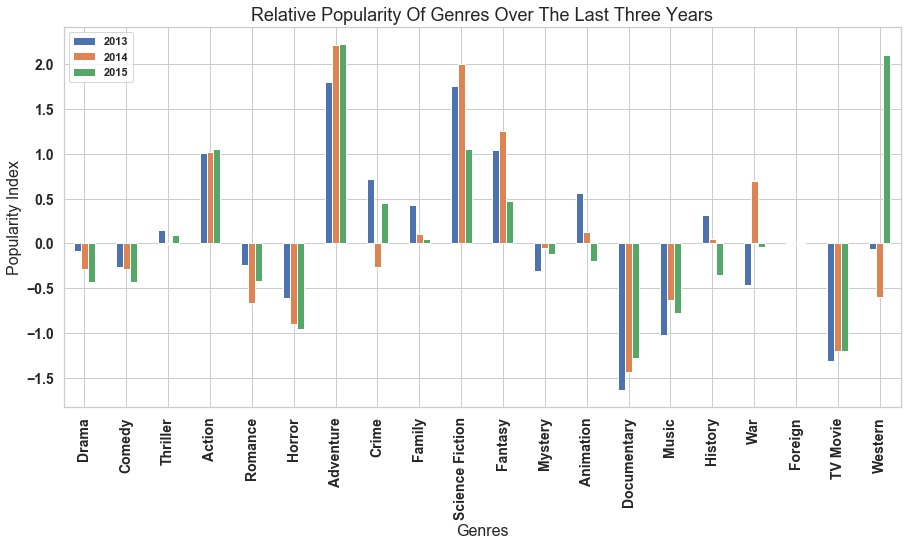

In [46]:
# Here we create a 'standerize' function which takes a dataframe as an argument and return that dataframe with standerize values.
def standerize(a):
    return (a-a.mean())/a.std()

# Here we standerize the popular_genre_df that we created for the above plot.
rel_popular_genre = standerize(popular_genre_df)

# Create bar diagram to visualize relative popularity of genres over the last three years
rel_popular_genre.iloc[:20, 53:].plot(kind='bar', figsize=(15,7), fontsize=14)

# Set style and label the plot
plt.title('Relative Popularity Of Genres Over The Last Three Years', fontsize=18)
plt.xlabel('Genres', fontsize=16)
plt.ylabel('Popularity Index', fontsize=16)
sns.set_style('whitegrid')

> **From this diagram we can confirm the conclusion that we get from the just above plot, that is more popular genres over the last three years are 'Adventure', 'Science Fiction', 'Action' and 'Fantasy'. And most popular genre is 'Adventure'.**

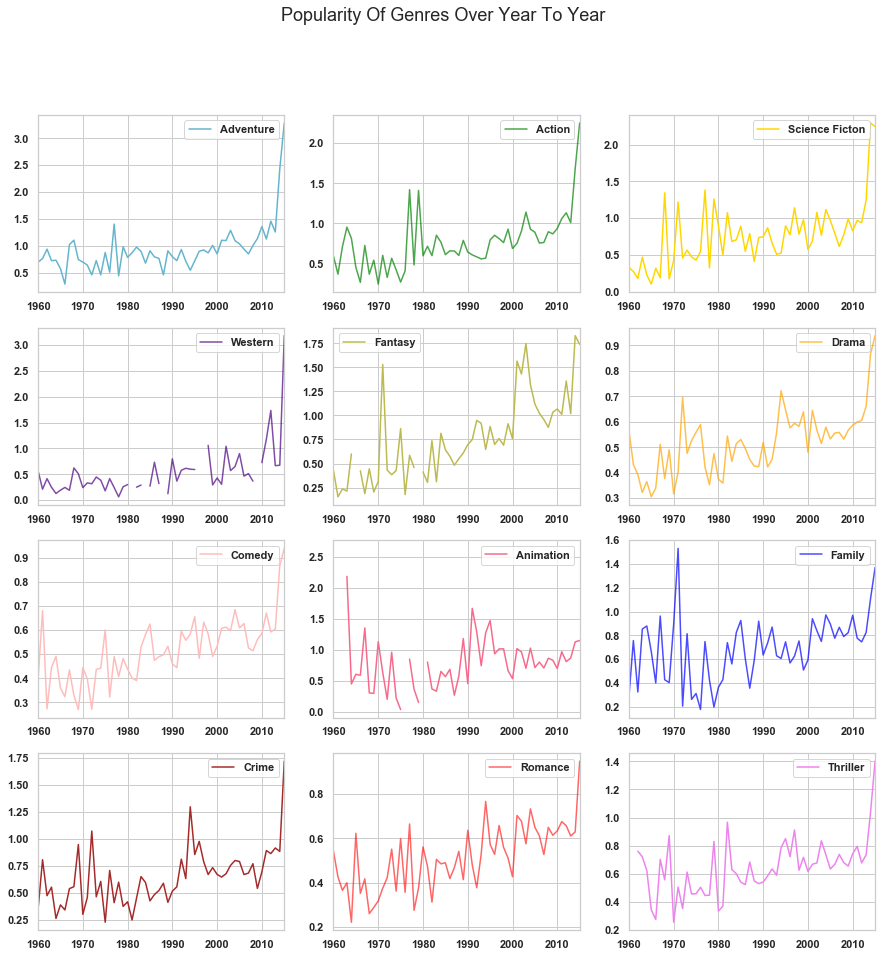

In [47]:
# Here we create subplots to see the over all trends of the popular genres.

fig, ax = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Popularity Of Genres Over Year To Year', fontsize=18)

popular_genre_df.loc['Adventure'].plot(label='Adventure', color='c', ax=ax[0][0], legend=True)
popular_genre_df.loc['Action'].plot(label='Action', color='green', alpha=.7, ax=ax[0][1], legend=True)
popular_genre_df.loc['Science Fiction'].plot(label='Science Ficton', color='gold', ax=ax[0][2], legend=True)
popular_genre_df.loc['Western'].plot(label='Western', color='indigo', alpha=.7, ax=ax[1][0], legend=True)
popular_genre_df.loc['Fantasy'].plot(label='Fantasy', color='#BCBA51', ax=ax[1][1], legend=True)
popular_genre_df.loc['Drama'].plot(label='Drama', color='orange', alpha=.7, ax=ax[1][2], legend=True)
popular_genre_df.loc['Comedy'].plot(label='Comedy', color='#FFBCBC', ax=ax[2][0], legend=True)
popular_genre_df.loc['Animation'].plot(label='Animation', color='#F76A8C', ax=ax[2][1], legend=True)
popular_genre_df.loc['Family'].plot(label='Family', color='blue', alpha=.7, ax=ax[2][2], legend=True)
popular_genre_df.loc['Crime'].plot(label='Crime', color='brown', ax=ax[3][0], legend=True)
popular_genre_df.loc['Romance'].plot(label='Romance', color='red', alpha=.6, ax=ax[3][1], legend=True)
popular_genre_df.loc['Thriller'].plot(label='Thriller', color='violet', ax=ax[3][2], legend=True)

### Q15: Which actor did maximum number of movies? Who are the top actors according to the number of movies he(she) did? Who are the top profitable actors?

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
dtype: int64


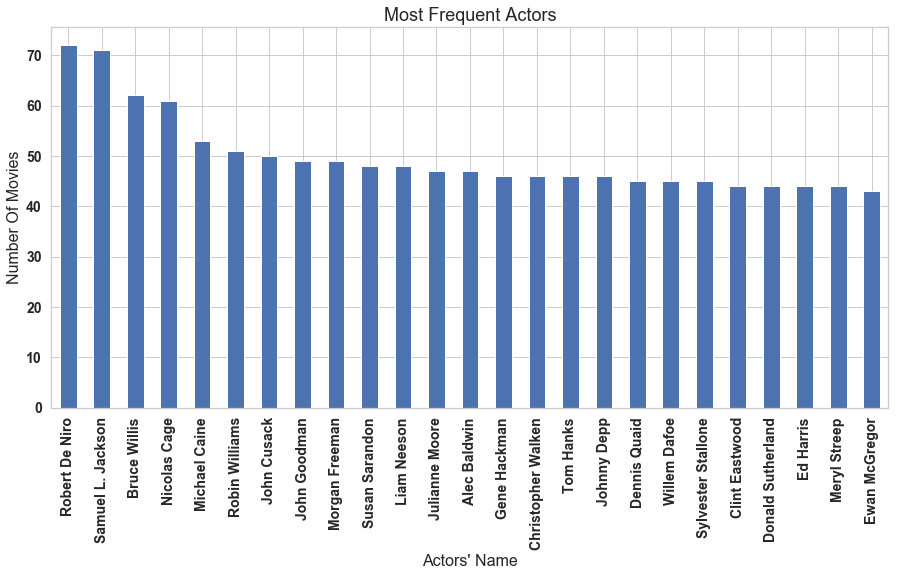

In [48]:
# Here we create a bar diagram to visualize how much movies top 25 actors did?

# We use count_category() function to get the occurrence of each actor in the movies_df dataframe
total_cast = count_category('cast')
print(total_cast.iloc[:3]) # Print top 3 actors and the number of movies they did

# Create bar diagram of top 25 actors
total_cast.iloc[:25].plot(kind='bar', figsize = (15,7), fontsize=14)
plt.title('Most Frequent Actors', fontsize=18)
plt.xlabel('Actors\' Name', fontsize=16)
plt.ylabel('Number Of Movies', fontsize=16)
sns.set_style('whitegrid')

> **From the above bar diagram we can see 'Robert De Niro' acted in 72 movies with highest number of movies. And followed by
'Samuel L. Jackson' with 71 movies and 'Bruce Willis' with 62 movies.**

In [49]:
# Here we create two new dataframe with the objective of finding profitable casts.
#map all the rows of cast in a list.

cast_str = list(map(str,(movies_df['cast'])))

# 'nan' is added at the end of the list to eliminate error
cast_list = total_cast.index.tolist()
cast_list.append('nan')
profit = np.array(movies_df['profit'])

# Create two new dataframe cast_df and count_cast_df and set the values of all cells to 0.0
cast_df = pd.DataFrame(index = cast_list, columns = ['Average Profit'])
count_cast_df = pd.DataFrame(index = cast_list, columns = ['Average Profit'])
cast_df = cast_df.fillna(value = 0.0)
count_cast_df = count_cast_df.fillna(value = 0.0)

# Modify the values of the dataframe
y = 0
for cast in cast_str:
    split_cast = list(map(str,cast.split('|')))
    cast_df.loc[split_cast] = cast_df.loc[split_cast] + profit[y]
    count_cast_df.loc[split_cast] = count_cast_df.loc[split_cast] + 1
    y+=1
    

                    Average Profit
Daisy Ridley          1.868178e+09
Santino Fontana       1.124219e+09
Bob Peck              8.571000e+08
Robert MacNaughton    7.824106e+08
Phaldut Sharma        6.113927e+08


Text(0, 0.5, 'Average Profit in B($)')

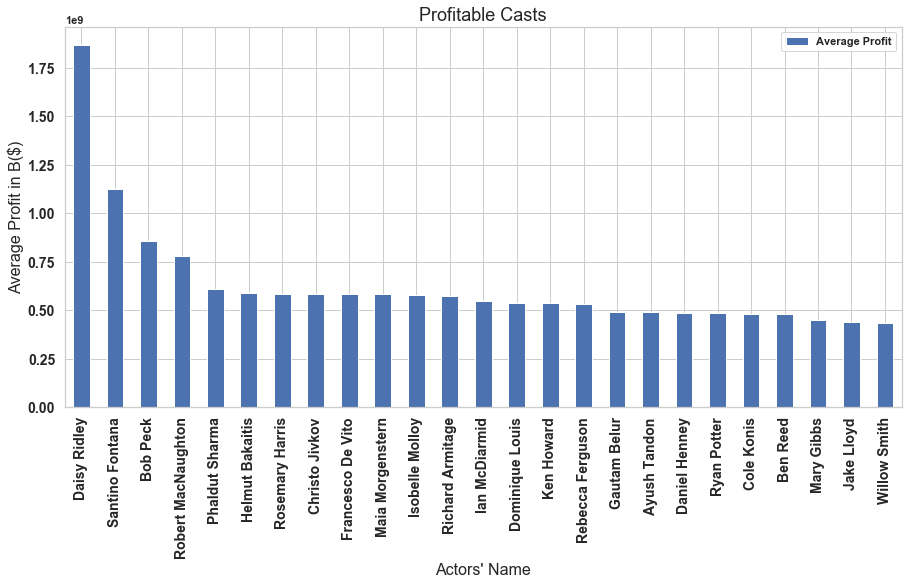

In [50]:
# We perform division between two dataframe to get average profit means profit per movie 
profitable_cast_df = cast_df.divide(count_cast_df)

# Sort according to the average profit
profitable_cast_df.sort_values(by='Average Profit', ascending=False, inplace=True)
print(profitable_cast_df[:5]) # Print top 5 profitable cast.

#Here we plot to see more popular genres over the last three years.
profitable_cast_df.iloc[:25].plot(kind='bar', figsize=(15,7), fontsize=14)

# Set style and label the plot
sns.set_style('whitegrid')
plt.title('Profitable Casts', fontsize=18)
plt.xlabel('Actors\' Name', fontsize=16)
plt.ylabel('Average Profit in B($)', fontsize=16)

### Q16: Which production company releassed maximum number of movies? Which are the top production companies in movie making?

Universal Pictures    522
Warner Bros.          509
Paramount Pictures    431
dtype: int64


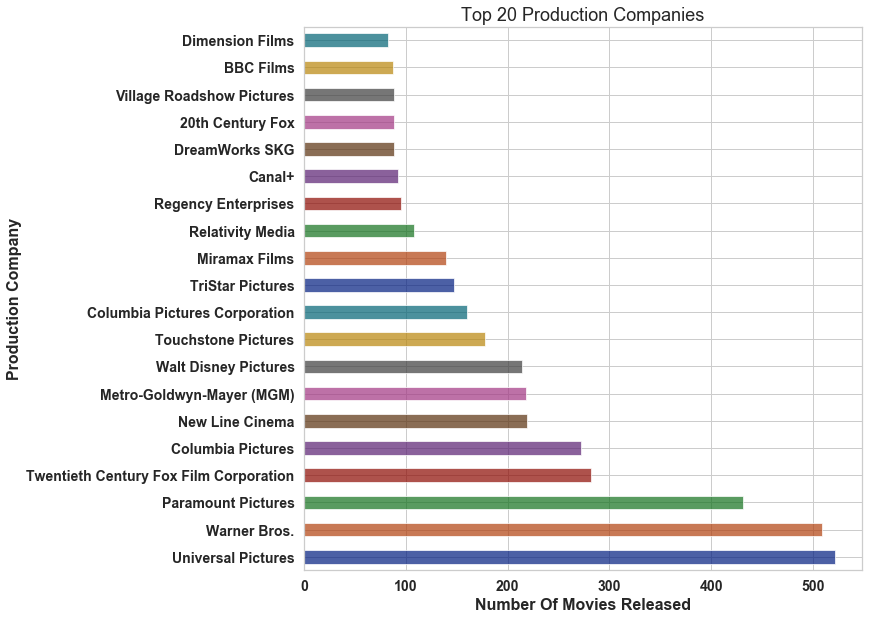

In [51]:
# Here we draw horizontal bar diagram for visualization of productions of the movie making company.

production_companies = count_category('production_companies')
print(production_companies.iloc[:3]) # Print top 3 production companies with their number of movies

# Create horizontal bar diagram for top 20 production companies and the number of movies they released.
production_companies.iloc[:20].plot(kind='barh', figsize=(10,10), color=sns.color_palette('dark'), alpha=.7, fontsize=14)

# Set style and label the plot
plt.title('Top 20 Production Companies', fontsize=18)
plt.xlabel('Number Of Movies Released', fontsize=16, weight='bold')
plt.ylabel('Production Company', fontsize=16, weight='bold')
sns.set_style('whitegrid')

> **From the above chart we can see 'Universal Pictures' has highest production of movies with 522 movies and followed by
'Warner Bros.' with 509 movies and 'Paramount Pictures' with 431 movies.**

### Q17: How much profits top production companies earned for the life time?

In [58]:
# Here we create a dataframe from production_company seris and make a list of all production companies.

production_companies = pd.DataFrame(production_companies)
production_company_list = list(map(str,(movies_df['production_companies'])))
companies = list(production_companies.index.values)

# Here append 'nan' to avoid uncessary error.
companies.append('nan')
movies_df['profit'] = movies_df['profit'].replace(np.NAN, 0)
profit = np.array(movies_df['profit'])

# Create a new dateframe and set the values to 0.0 for all the cells.
companies_df = pd.DataFrame(index=companies, columns = ['Total Profit'])
companies_df = companies_df.fillna(value = 0.0)

# Modify the values of the dataframe according to the necessity
x=0
for company in production_company_list:
    company_list = list(map(str,company.split('|')))
    companies_df.loc[company_list,'Total Profit'] = companies_df.loc[company_list, 'Total Profit'] + profit[x]
    x+=1
    

                    Total Profit
Universal Pictures  3.067111e+10
Warner Bros.        3.246550e+10
Paramount Pictures  2.603248e+10


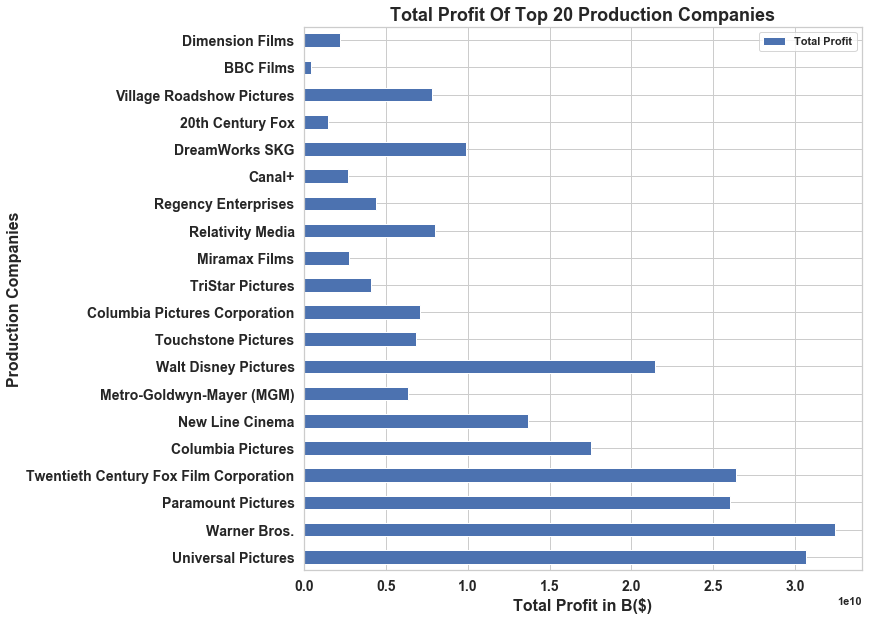

In [59]:
# Here we plot a horizontal bar diagram to visualizze the profits of the production companies.

print(companies_df.iloc[:3]) # Print top 3 companies with their profits

#Draw a bar diagram of top 20 production companies.
companies_df.iloc[:20].plot(kind='barh', figsize=(10,10), fontsize=14, legend=True)

plt.title('Total Profit Of Top 20 Production Companies', fontsize=18, weight='bold')
plt.xlabel('Total Profit in B($)', fontsize=16, weight='bold')
plt.ylabel('Production Companies', fontsize=16, weight='bold')
sns.set_style('whitegrid')

> **From the above visualization we can see that 'Warner Bros.' earned the highest profits of 32.46 B and followed by 'Universal Pictures' with 30.67 B and 'Paramount Pictures' with 26.03 B.**

### Q18: Which director directed maximum number of movies? Who are the top directors?

Woody Allen        46
Clint Eastwood     34
Martin Scorsese    31
dtype: int64


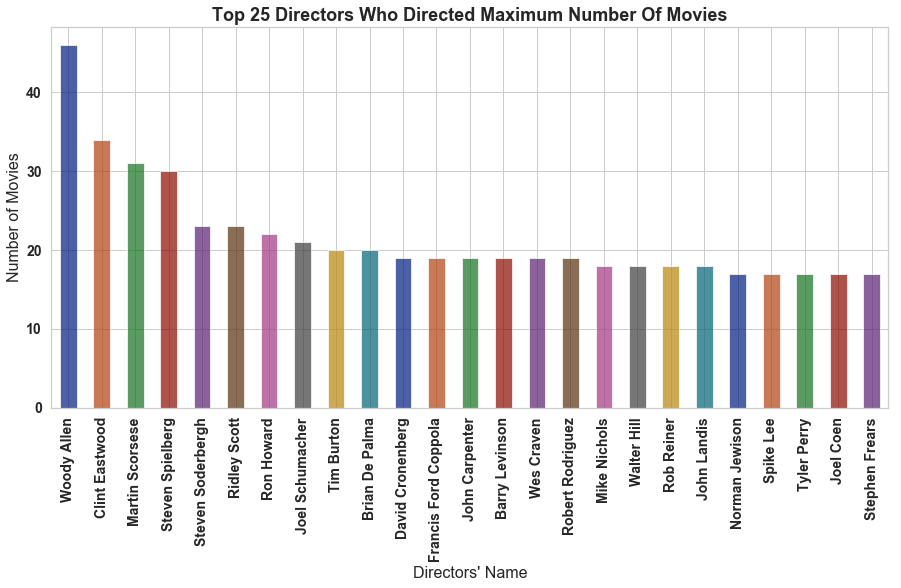

In [54]:
# Here we plot horizontal bar diagram to get an idea about the directors i.e. how much movies they directed??

movies_directors = count_category('director')
print(movies_directors.iloc[:3]) # Print top 3 directors with the number of movies they directed

# We create horizontal bar diagram for top 25 directors
movies_directors.iloc[:25].plot(kind='bar', figsize=(15,7), fontsize=14, color=sns.color_palette('dark'), alpha=.7)
plt.title('Top 25 Directors Who Directed Maximum Number Of Movies', fontsize=18, weight='bold')
plt.xlabel('Directors\' Name', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)
sns.set_style('whitegrid')

> **From the above visualizations we can say 'Woody Allen' directed 46 movies with the maximum number of movies. And followed 
by 'Clint Eastwood' with 34 and 'Martin Scorsese' with 31 movies.**

### Q19: Which are the most popular keywords?

[['woman director', 413], ['independent film', 396], ['based on novel', 278], ['sex', 272], ['sport', 216]]


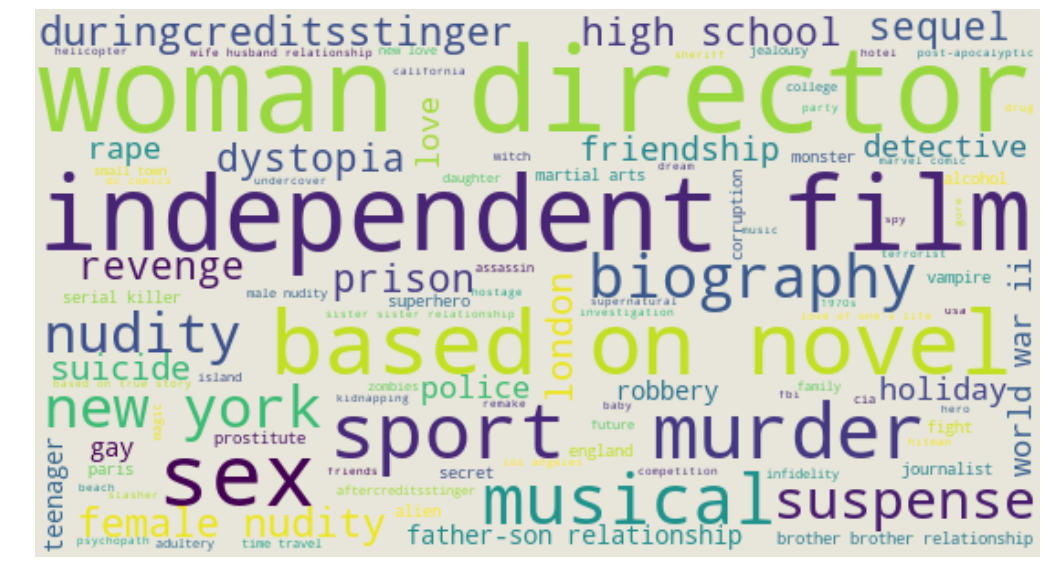

In [55]:
# Here we create a wordcloud to visualize the most popular keywords.

keywords_count = count_category('keywords')
keywords_list = []
for key in keywords_count.index:
    keywords_list.append([key, keywords_count[key]])

print(keywords_list[:5]) # Print top 5 popular keywords
keywords = dict()

# Get the top 100 keywords
for kw in keywords_list[:100]:
    keywords[kw[0]] = kw[1]
    
# plot wordcloud to visualize top 100 popular keywords
f, ax = plt.subplots(figsize=(18,14))
wordcloud = WordCloud(background_color='#E8E6DA', max_font_size=70, width=550, height=300)
wordcloud.generate_from_frequencies(keywords)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



> **From the above visualization we can say that top 5 popular keywords are 'woman director', 'independent film', 'based on novel', 'sex', 'sport'.**

### Q20: What are the correlations between budget, revenue, profit, vote_average and popularity?

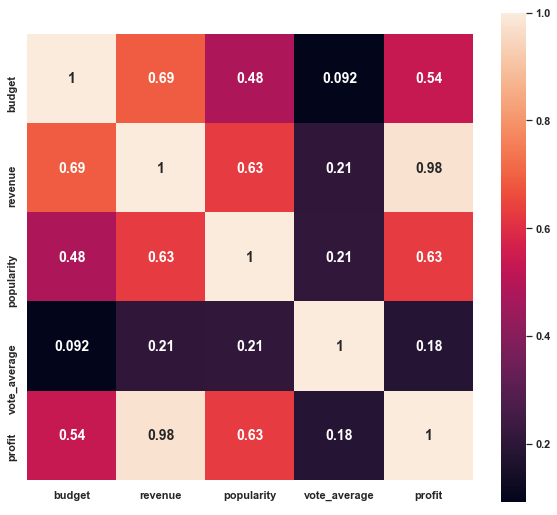

In [56]:
# We create a function correlation_map which take a dataframe as an argument and plot a square dataset
# Here we find the correlation coefficients between 'budget', 'revenue', 'profit', 'vote_average' and 'popularity'

def correlation_map(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10,10))
    _ = sns.heatmap(corr, square=True, cbar_kws={'shrink':.9}, ax=ax, annot=True, annot_kws={'fontsize':14})
    
correlation_map(movies_df[['budget','revenue','popularity','vote_average','profit']])

> **From the above square dataset we can find that how much the factors are dependant on each other. From this chart we get an 
overall visualization about all the varying factors and how they related to the others varying factors.**

In [57]:
# Create a dataframe with top 5 from 'cast', 'director', 'keywords' and 'genres'

cast = count_category('cast').index.tolist()
directors = count_category('director').index.tolist()
keywords = count_category('keywords').index.tolist()
genres = count_category('genres').index.tolist()
popular_df = pd.DataFrame({'Popular Cast':cast[:5], 'Popular Director':directors[:5],
                           'Popular Keywords':keywords[:5], 'Popular Genres':genres[:5]})
popular_df

,Popular Cast,Popular Director,Popular Keywords,Popular Genres
0,Robert De Niro,Woody Allen,woman director,Drama
1,Samuel L. Jackson,Clint Eastwood,independent film,Comedy
2,Bruce Willis,Martin Scorsese,based on novel,Thriller
3,Nicolas Cage,Steven Spielberg,sex,Action
4,Michael Caine,Steven Soderbergh,sport,Romance


<div id="conclusions"></div>

## Conclusions of the Analysis:

<div style="font-size:16px">
    
>Primary objective of this analysis is to explore two parts, one is quantitative parts and another is categorical parts.
   - Part One: Find the quantitative features of a successful movie.
     I explore some questions about quantitative features to find dependencies of a successful movie. I found the following -
        - Popularity of movie depends on budget and revenue of the movie somehow. It means a movie with high budget and high    revenue is expected to get higher popularity.
        - Profit earned by a movie is largly depends on budget and the popularity of the movie. As high budget movie will be contentually more rich and generates interest to the audience and profit will be generated. 
        - Rating of a movie slightly depends on budget but more affected by the popularity.
        - Movies released in recent years are shorter than the movies released long years back.
        - Runtime does not affect the rating of movie.
   - Part Two: Find categorical features of a successful movie.
      I explore categorical features such as cast, director, keywords, genres etc to find successful movie dependencies. I found the following -
        - More movies released with these genres 'Drama', 'Comedy', 'Thriller', 'Action' though most popular genres in the last three years are 'Adventure', 'Science Fiction', 'Action', 'Fantasy'.
        - More popular keywords are 'Woman director', 'Independent Film', 'Based on novel', 'sex', 'sport'.
        - Top three profitable casts are 'Daisy Ridley', 'Santino Fontana' and 'Bob Peck'.

</div>


<div id="result"></div>

## Communicate the results:
<br></br>

<div style="font-size:16px">

This analysis is based on a TMDB movie dataset that contains around 10000 movies. Goal of this analysis is to get a visualization of this large dataset, get an idea of the trends of varying factors over the years, get the dependant foctors of the successful movies. For the shake of analysis I drawn different kinds of chart and modify the dataframe accordingly. And from the analysis we can draw this conclusion that - a movie that is built with more budget, and with more popular genres and cast and with more popular keywords will be more successfull. Though this has following limitations -

> Limitations:
   - There are 0 values in budget and revenue, but that is not possible in real. And so, those are modyfied according to necessity of analysis. Hence analysis on total realistic dataset may differ from these results.
   - For ease of analysis mean of varying factors are used, so the analysis that deeply interact with the dataset by various process may differ from this analysis somehow.
   - This analysis is based on statistical measurements to get an approximation and visualization. Though these methods are scientifically approved for analysis, some real case scenarios may differ from these results of the analysis.
    
</div>

<div id="ref"></div>

## Referrences:

<div style="font-size:16px">

<ul>
    <li><a href="https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf">TMDB Dataset</a></li>
    <li><a href="https://docs.scipy.org/doc/numpy/">Numpy</a></li>
    <li><a href="https://pandas.pydata.org/pandas-docs/stable/reference/index.html#api">Pandas</a></li>
    <li><a href="https://matplotlib.org/3.2.1/contents.html">Matplotlib</a></li>
    <li><a href="https://medium.com/@onpillow/01-investigate-tmdb-movie-dataset-python-data-analysis-project-part-1-data-wrangling-3d2b55ea7714">Medium Article</a></li>
    
</ul>

</div>